<a href="https://colab.research.google.com/github/kojiyam/information-theory/blob/main/it1_modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 可聴帯域搬送波のBPSK変調信号

Shift+Enterで実行

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background') # for dark-mode
from matplotlib import animation
import IPython.display

In [2]:
# 音の保存のパラメータ（通信基礎論・情報伝送工学）
sampling_rate = 10e3 # 音を保存するときの標本化周波数
T_LENGTH = 10 # 音の時間長 (s)
t = np.arange( T_LENGTH * sampling_rate ) / sampling_rate # 標本化時刻

In [3]:
s0 = 0.5 * np.cos(2*np.pi*523*t)

In [4]:
IPython.display.Audio(s0, rate = sampling_rate)

In [5]:
s1 = s0 * np.cos(2*np.pi*1*t)

In [6]:
IPython.display.Audio(s1, rate = sampling_rate)

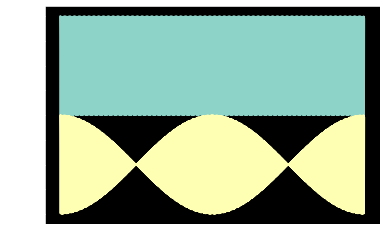

In [7]:
# 1 s 間の波形
plt.plot(t[0:int(1*sampling_rate)],s0[0:int(1*sampling_rate)]+1)
plt.plot(t[0:int(1*sampling_rate)],s1[0:int(1*sampling_rate)])

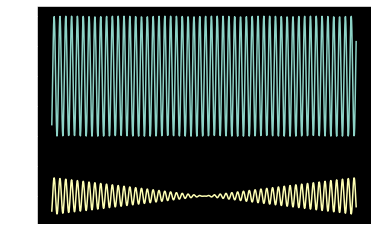

In [8]:
# 200 ms -- 300ms 間の波形
t_start = int(200e-3*sampling_rate)
t_end = int(300e-3*sampling_rate)
plt.plot(t[t_start:t_end],s0[t_start:t_end]+1)
plt.plot(t[t_start:t_end],s1[t_start:t_end])

## 位相変化の確認

In [9]:
# 動画のインターバル．fpsの逆数
INTERVAL = 50 # (ms) 50 ms だと20 fps

In [16]:
fig, ax = plt.subplots()
plt.close()
ax.set_xlim((-0.6, 0.6))
ax.set_ylim((-0.6, 0.6))
ax.set_aspect('equal')
#line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)

# オシロスコープのx-yモード

xに搬送波

yにも搬送波

In [17]:
def animate(i):
  line2.set_data(s0[i*int(INTERVAL*1e-3*sampling_rate):(i+1)*int(INTERVAL*1e-3*sampling_rate)],s0[i*int(INTERVAL*1e-3*sampling_rate):(i+1)*int(INTERVAL*1e-3*sampling_rate)])
anim = animation.FuncAnimation(fig, animate, frames=100, interval=INTERVAL, blit=False)
IPython.display.HTML(anim.to_jshtml())

xに搬送波

yに搬送波*(-1)

In [18]:
def animate(i):
  line2.set_data(s0[i*int(INTERVAL*1e-3*sampling_rate):(i+1)*int(INTERVAL*1e-3*sampling_rate)],-s0[i*int(INTERVAL*1e-3*sampling_rate):(i+1)*int(INTERVAL*1e-3*sampling_rate)])
anim = animation.FuncAnimation(fig, animate, frames=100, interval=INTERVAL, blit=False)
IPython.display.HTML(anim.to_jshtml())

xに搬送波

yに変調波

In [19]:
def animate(i):
  line2.set_data(s0[i*int(INTERVAL*1e-3*sampling_rate):(i+1)*int(INTERVAL*1e-3*sampling_rate)],s1[i*int(INTERVAL*1e-3*sampling_rate):(i+1)*int(INTERVAL*1e-3*sampling_rate)])
anim = animation.FuncAnimation(fig, animate, frames=100, interval=INTERVAL, blit=False)
IPython.display.HTML(anim.to_jshtml())

上の2つのグラフを行き来していることが見て取れる

# 基礎実験3章の復習 リサジュー

In [22]:
x = 0.5 * np.cos(2*np.pi*200*t)
y = 0.5 * np.cos(2*np.pi*300.1*t)

def animate(i):
  line2.set_data(x[i*int(INTERVAL*1e-3*sampling_rate):(i+1)*int(INTERVAL*1e-3*sampling_rate)],y[i*int(INTERVAL*1e-3*sampling_rate):(i+1)*int(INTERVAL*1e-3*sampling_rate)])
anim = animation.FuncAnimation(fig, animate, frames=100, interval=INTERVAL, blit=False)
IPython.display.HTML(anim.to_jshtml())

# 参考

動画表示：https://yaju3d.hatenablog.jp/entry/2018/07/31/234724